In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [5]:
df = pd.read_csv('./DATA/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df['price'].median()

450000.0

<AxesSubplot:xlabel='price', ylabel='Count'>

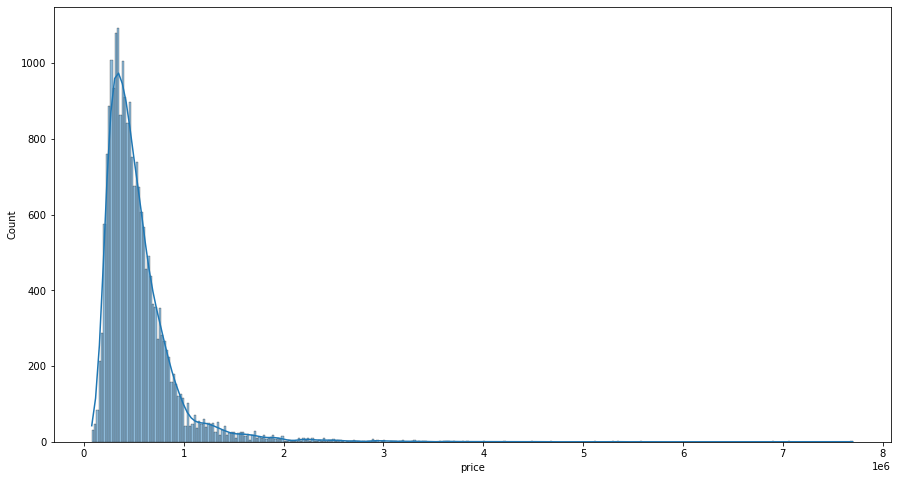

In [10]:
plt.figure(figsize = (15,8))
sns.histplot(df.price, kde = True)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

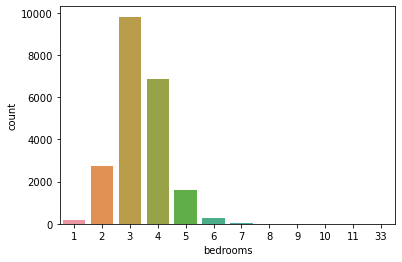

In [11]:
sns.countplot(data=df, x='bedrooms')

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

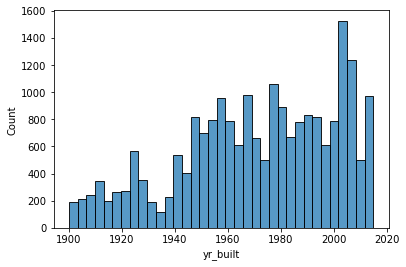

In [12]:
sns.histplot(df['yr_built'])

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

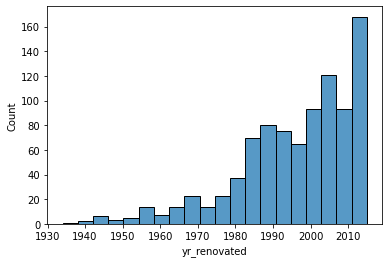

In [13]:
sns.histplot(df[df['yr_renovated']!=0]['yr_renovated'])

<AxesSubplot:>

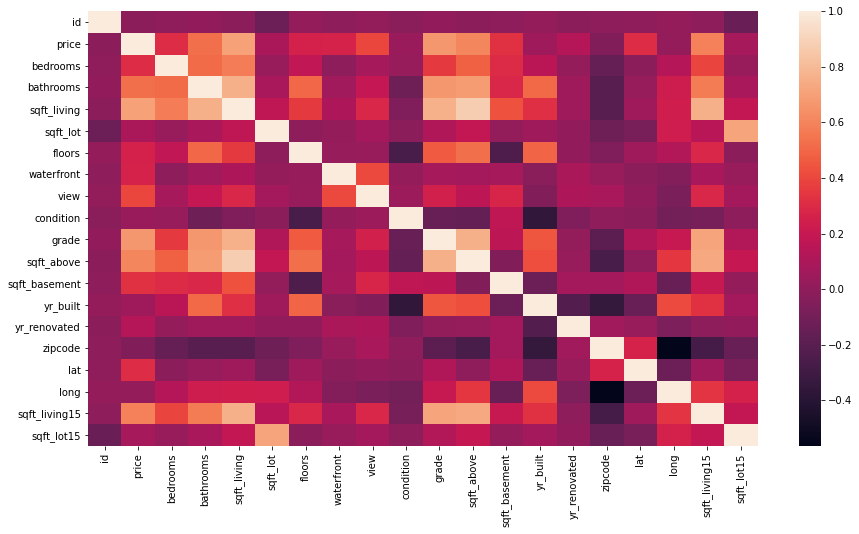

In [14]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr())

In [15]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

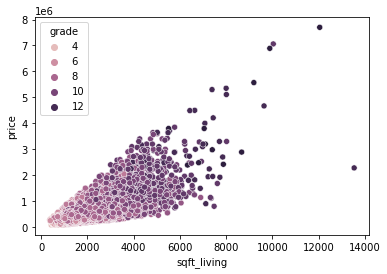

In [16]:
sns.scatterplot(data = df, x='sqft_living', y='price', hue='grade')

<AxesSubplot:xlabel='sqft_living', ylabel='grade'>

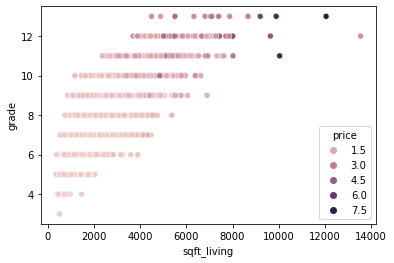

In [17]:
sns.scatterplot(data = df, x='sqft_living', y='grade', hue='price')

<AxesSubplot:xlabel='grade', ylabel='price'>

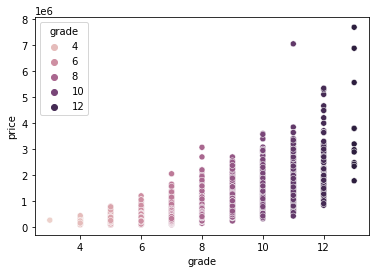

In [18]:
sns.scatterplot(data = df, x='grade', y='price', hue='grade')


import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon

king_county_map = gpd.read_file('King_County_with_Natural_Shoreline_for_Puget_Sound_and_Lake_Washington___kingsh_area.shp')
king_county_map.plot()

crs = {'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df,crs = crs, geometry = geometry)

geo_df['price_log'] = np.log(df['price'])

fig, ax = plt.subplots(figsize = (10,10))
king_county_map.plot(ax=ax, color='lightgrey', figsize=(20,200))
geo_df[geo_df['price']<3e+06].plot(column = 'grade', ax=ax, cmap='summer', 
                                legend=True, legend_kwds={'shrink': 0.3},
                               markersize=10)
ax.set_title('King County Real Estate')


<AxesSubplot:xlabel='long', ylabel='lat'>

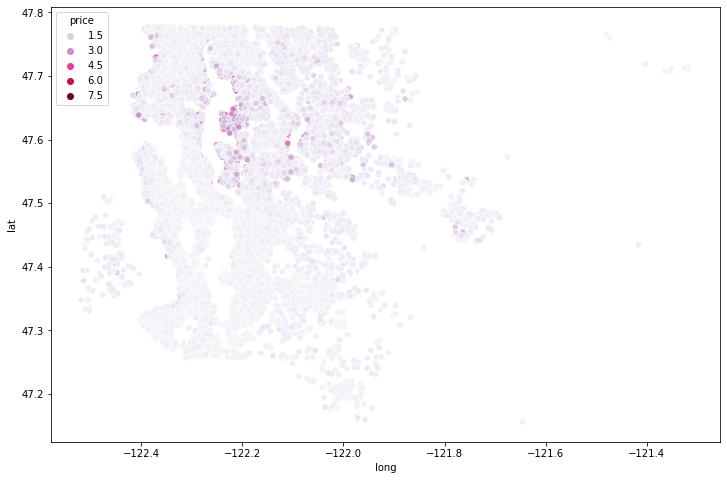

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat', hue='price', palette='PuRd')

<AxesSubplot:xlabel='long', ylabel='lat'>

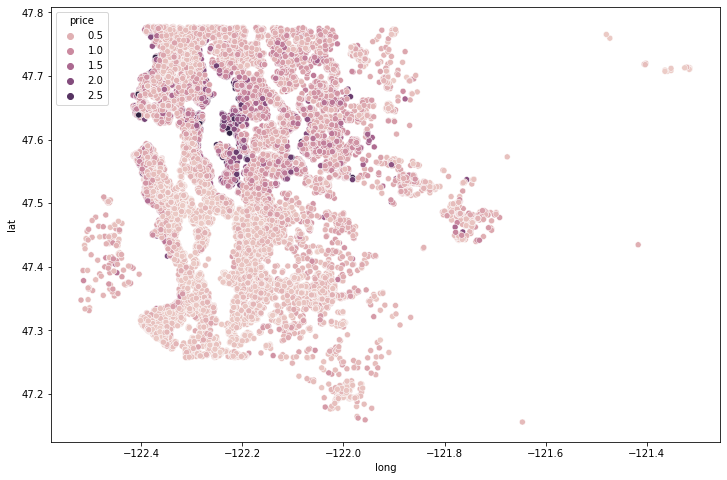

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df[df['price']<3e+06], x='long', y='lat', hue='price')

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df = df.drop('id', axis = 1)


In [23]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
df['date'][0].year

2014

In [25]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df = df.drop('date', axis = 1)

In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='price', ylabel='month'>

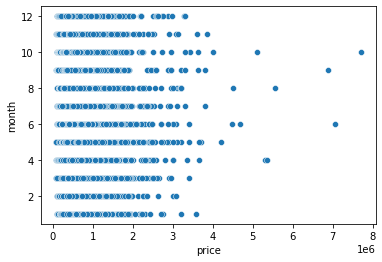

In [27]:
sns.scatterplot(data = df, x='price', y='month')

<AxesSubplot:xlabel='month', ylabel='price'>

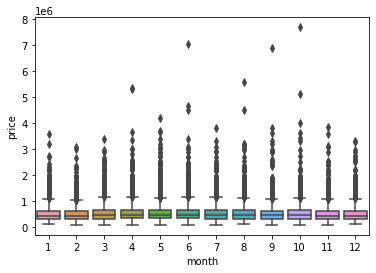

In [28]:
sns.boxplot(data = df, x='month', y = 'price')

In [29]:
##df['zipcode'].value_counts()
df = df.drop('zipcode', axis = 1)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [31]:
X = df.drop('price', axis = 1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 101)

In [32]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [34]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
         batch_size=128, epochs=300)

Epoch 1/300
119/119 [==============================] - 1s 3ms/step - loss: 430233190400.0000 - val_loss: 418868625408.0000
Epoch 2/300
119/119 [==============================] - 0s 804us/step - loss: 428383272960.0000 - val_loss: 412454977536.0000
Epoch 3/300
119/119 [==============================] - 0s 797us/step - loss: 403040894976.0000 - val_loss: 355307913216.0000
Epoch 4/300
119/119 [==============================] - 0s 797us/step - loss: 289842364416.0000 - val_loss: 190386847744.0000
Epoch 5/300
119/119 [==============================] - 0s 814us/step - loss: 134495166464.0000 - val_loss: 97877893120.0000
Epoch 6/300
119/119 [==============================] - 0s 788us/step - loss: 99003998208.0000 - val_loss: 94634426368.0000
Epoch 7/300
119/119 [==============================] - 0s 780us/step - loss: 96869539840.0000 - val_loss: 92964503552.0000
Epoch 8/300
119/119 [==============================] - 0s 771us/step - loss: 95017058304.0000 - val_loss: 91157118976.0000
Epoch 9/3

In [35]:
model.history.history

{'loss': [430233190400.0,
  428383272960.0,
  403040894976.0,
  289842364416.0,
  134495166464.0,
  99003998208.0,
  96869539840.0,
  95017058304.0,
  93138141184.0,
  91231748096.0,
  89248096256.0,
  87181672448.0,
  85009022976.0,
  82756698112.0,
  80519790592.0,
  78076600320.0,
  75613413376.0,
  73031942144.0,
  70457982976.0,
  67811192832.0,
  65162911744.0,
  62612537344.0,
  60270735360.0,
  58095095808.0,
  56207134720.0,
  54595768320.0,
  53236387840.0,
  52180725760.0,
  51253952512.0,
  50444001280.0,
  49776840704.0,
  49209659392.0,
  48640004096.0,
  48127164416.0,
  47685058560.0,
  47181225984.0,
  46735568896.0,
  46327472128.0,
  45874184192.0,
  45464203264.0,
  45011787776.0,
  44610506752.0,
  44175978496.0,
  43855544320.0,
  43424944128.0,
  43039207424.0,
  42684092416.0,
  42355077120.0,
  41983217664.0,
  41623863296.0,
  41306009600.0,
  40960266240.0,
  40659599360.0,
  40344772608.0,
  40088473600.0,
  39829139456.0,
  39587102720.0,
  39331864576.0,
 

<AxesSubplot:>

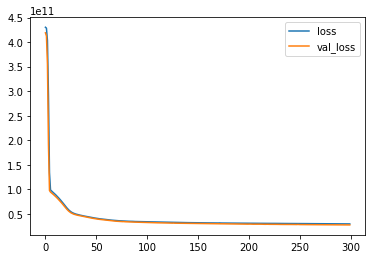

In [36]:
model_history = pd.DataFrame(model.history.history)
model_history.plot()

In [37]:
y_pred = model.predict(X_test)

In [44]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')
print(f'Exp. variance: {explained_variance_score(y_test, y_pred)}')

MAE: 102545.88578076774
MSE: 27769228018.641956
RMSE: 320.2278654033214
Exp. variance: 0.7906355078005594


In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [48]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')
print(f'Exp. variance: {explained_variance_score(y_test, y_pred)}')

MAE: 123999.2993493
MSE: 40434066668.251526
RMSE: 352.135342374633
Exp. variance: 0.6951126522654758


In [49]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [50]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')
print(f'Exp. variance: {explained_variance_score(y_test, y_pred)}')

MAE: 123817.36623032865
MSE: 40417374876.50221
RMSE: 351.8769191497627
Exp. variance: 0.6952363793230334


In [51]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [52]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_absolute_error(y_test, y_pred))}')
print(f'Exp. variance: {explained_variance_score(y_test, y_pred)}')

MAE: 219261.00846217386
MSE: 139617272977.86844
RMSE: 468.25314570451513
Exp. variance: 0.0013605548789528132
